# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [53]:
import pandas as pd
import numpy as np

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [38]:
df = pd.read_csv('train.csv')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [41]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

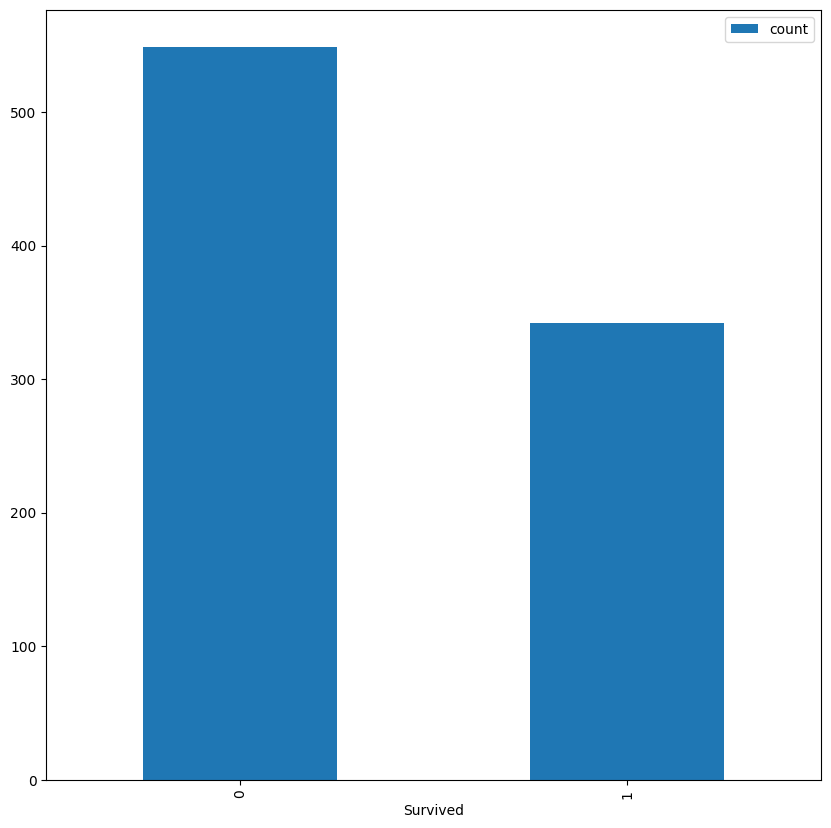

In [42]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [43]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [44]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<Axes: xlabel='Survived'>

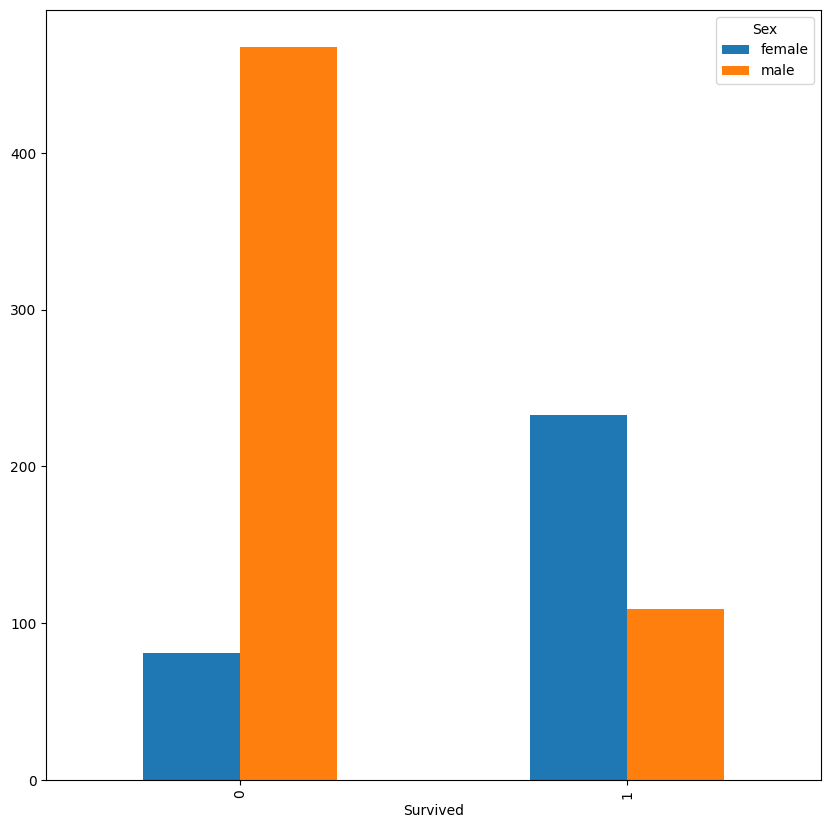

In [45]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [46]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [47]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

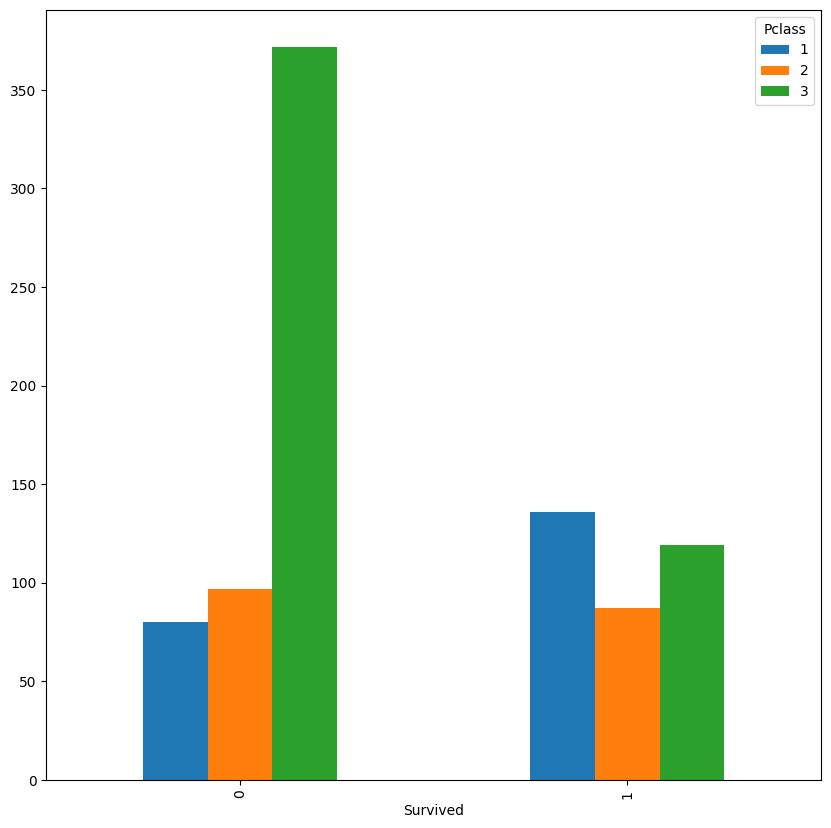

In [48]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [74]:
df['generation'] = pd.cut(np.array(df['Age']), 8)

C:\Users\Rodrigue\AppData\Local\Temp\ipykernel_16052\3191251805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation'] = pd.cut(df['Age'], 8)


In [62]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [56]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(np.array(df['Age']), 8)

[(20.315, 30.263], (30.263, 40.21], (20.315, 30.263], (30.263, 40.21], (30.263, 40.21], ..., (20.315, 30.263], (10.368, 20.315], NaN, (20.315, 30.263], (30.263, 40.21]]
Length: 891
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [67]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,"(20.315, 30.263]","(-0.512, 42.694]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,"(10.368, 20.315]","(-0.512, 42.694]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,"(-0.512, 42.694]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,"(20.315, 30.263]","(-0.512, 42.694]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,"(30.263, 40.21]","(-0.512, 42.694]"


C:\Users\Rodrigue\AppData\Local\Temp\ipykernel_16052\1201001995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='Survived'>

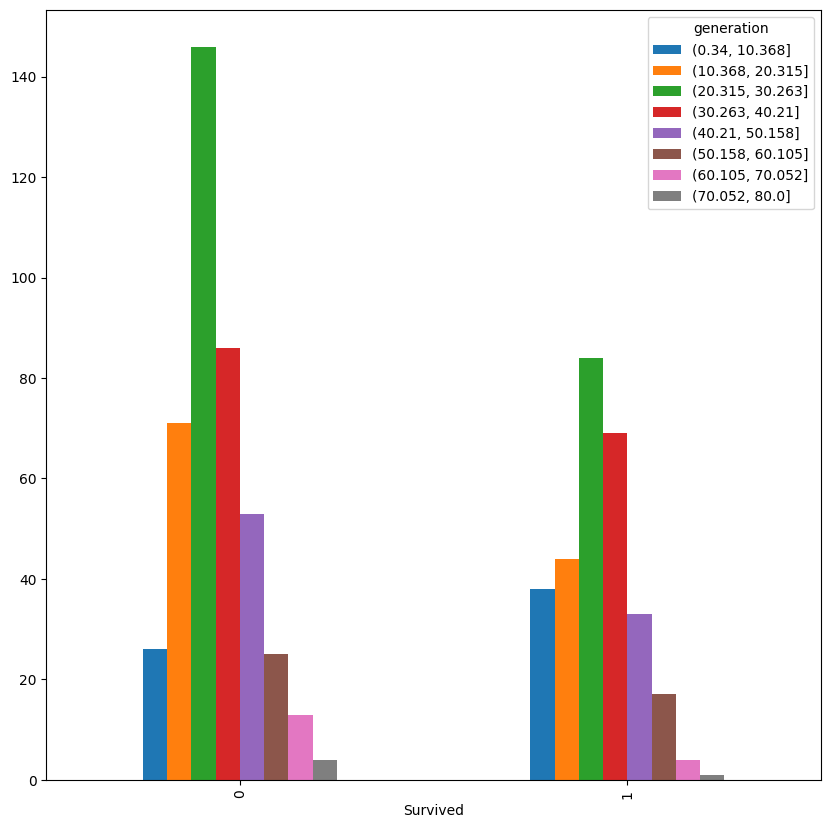

In [58]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [65]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [60]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

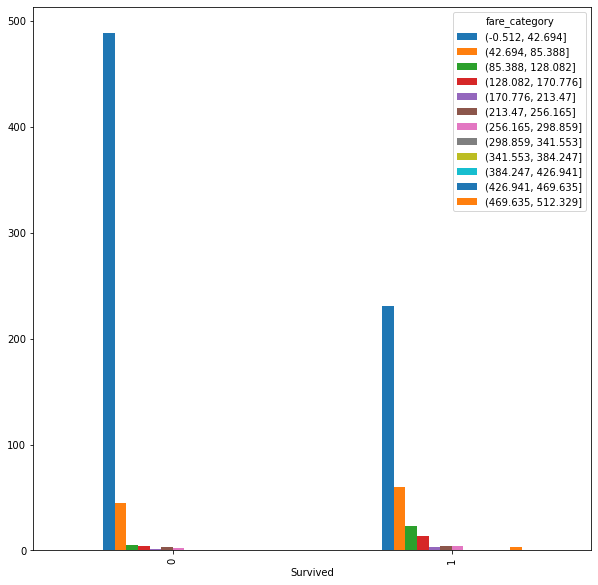

In [19]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [20]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [21]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?